In [6]:
# ==============================
# Standard Library Imports
# ==============================
from enum import Enum
import random

# ==============================
# Third-party Library Imports
# ==============================
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy
import pennylane as qml
import scipy as sp
from autograd import grad, jacobian

# Pennylane numpy
from pennylane import numpy as pnp 

# ==============================
# Import files
# ==============================
import BFGS as BFGS
import config

In [7]:
# ==============================
# Setup for Quantum Computations
# ==============================

# PennyLane settings
dev = qml.device('default.qubit', wires=2)

# Define Hamiltonian for quantum computations
H = qml.Hamiltonian(coeffs=[-0.5, -0.5], observables=[qml.PauliZ(0), qml.PauliZ(1)])

$$
H = -0.5 \cdot Z_0 - 0.5 \cdot Z_1 
$$

$$
= -0.5 \cdot (Z \otimes I) - 0.5 \cdot (I \otimes Z)
$$

$$
where,
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

In [8]:
def Dephase_factor(tau):
    """ Take tau and return gamma based on the following relation."""

    Calculate_Gamma = 1 - np.exp(-2 * tau)
    
    return Calculate_Gamma    # Return gamma

$$
Let, e^{-t/T_2} = e^{-\tau}
$$

$$
\frac{1}{2} 

\begin{bmatrix}

1 & e^{(i\phi - \tau)} \\
e^{(-i\phi - \tau)} & 1

\end{bmatrix}

=

\frac{1}{2} 

\begin{bmatrix}

1 & e^{i\phi} \sqrt{1 - \gamma} \\
e^{-i\phi} \sqrt{1 - \gamma} & 1

\end{bmatrix}
$$

$$

$$

$$
Then,
\quad \gamma = 
1 - e^{-2 \tau}
$$

$$ 
e^{-\tau} = \sqrt{1 - \gamma}
$$

In [9]:
@qml.qnode(dev, interface='autograd')
def circuit(paras):
    
    # Assign paras
    theta_x, tau_1, tau_2 = paras[0], paras[1], paras[2]
    phi = config.PHI_GLOBAL

    # Stage_1: RY for pi/2
    qml.RY(np.pi/2, wires=0)
    qml.RY(np.pi/2, wires=1)
    
    # Stage_2: Entangler    
    qml.ApproxTimeEvolution(H, tau_1, 1)
    
    qml.RX(theta_x, wires = 0)    
    qml.RX(theta_x, wires = 1)    

    qml.RY(-np.pi/2, wires = 0)    
    qml.RY(-np.pi/2, wires = 1)   

    qml.ApproxTimeEvolution(H, tau_2, 1)

    qml.RY(np.pi/2, wires = 0)    
    qml.RY(np.pi/2, wires = 1) 
    
    # Stage_3: Accumulator
    qml.ApproxTimeEvolution(H, phi, 1)
    
    qml.RX(np.pi/(2), wires=0)
    qml.RX(np.pi/(2), wires=1)
    # qml.RY(-np.pi/(2+1e-6), wires=0)
    # qml.RY(-np.pi/(2+1e-6), wires=1)
    
    return qml.state()

In [10]:
Sweep_data = np.array([0, pnp.pi*2,  1e-2])  #1e-2 ~ (4pi + 1e-2)
paras_init = pnp.array([np.pi/2, np.pi/2, np.pi/2])

Optimized_Result = BFGS.run_optimization(Sweep_data, paras_init, 0, 1, circuit)
plt.plot(Optimized_Result[1][:, config.DataIndex.PHI.value], Optimized_Result[1][:, config.DataIndex.CFI.value])

plt.title(f'[2-qubit] After BFGS')
plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
# paras_init = pnp.array([np.pi/2, np.pi/2, np.pi/2])

# PHI = np.arange(0, 3*np.pi, 1e-2)
# Data = np.zeros((len(PHI), 2))
# Data[:, 0] = PHI.squeeze()

# for phi_idx, phi in enumerate(PHI):
#     Data[phi_idx, 1] = BFGS.Cost_function(paras_init, circuit)

NameError: name 'Phi_global' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


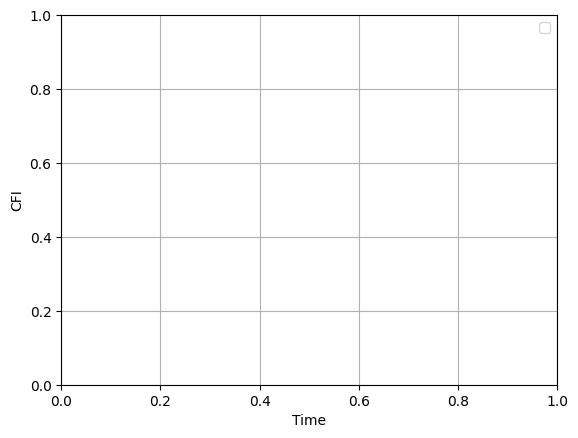

In [ ]:

plt.plot(Data[:,0], Data[:, 1])
plt.xlabel('Time')
plt.ylabel('CFI')
plt.grid()
plt.legend()